<a href="https://colab.research.google.com/github/brunompasini/Digit-Recognizer/blob/master/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Notebook by Bruno Pasini

github.com/brunompasini

In [18]:
from google.colab import files
uploaded = files.upload()

## Imports

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras.optimizers import RMSprop

## Reading Data

In [20]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()
x_train = train.drop(['label'], axis=1)
y_train = train['label']

## Normalizing and Reshaping

In [21]:
x_train = x_train/255.0
test = test/255.0

In [22]:
x_train.shape
# images are 28x28 but are 784 px in line
# and another dimension bc they are in grayscale

x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

x_train.shape

(42000, 28, 28, 1)

## Callbacks class



In [36]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epock,logs={}):
    if (logs.get('accuracy')>=0.99):
      print("\nAccuracy is over 99%")
      self.model.stop_training = True

callbacks = myCallback()

## CNN Model

In [31]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10, activation='softmax')
])
#dropout lacking
model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics = ['accuracy'], callbacks=[callbacks])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3200)             

In [37]:
history = model.fit(x_train, y_train, epochs=10, batch_size = 100, callbacks=[callbacks])

Epoch 1/10
420/420 [==============================] - ETA: 0s - loss: 0.0303 - accuracy: 0.9909
Accuracy is over 99%
420/420 [==============================] - 7s 18ms/step - loss: 0.0303 - accuracy: 0.9909


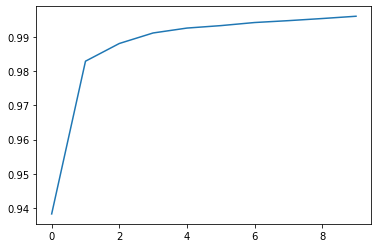

In [26]:
plt.plot(history.history['accuracy'])

In [34]:
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("mnist_kaggle.csv",index=False)

In [ ]:
# got a 0.99142 score on kaggle